In [41]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate

    def activation(self, weighted_sum):
      return np.where(weighted_sum <= 0, 0, 1)
      
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, inputs, labels, num_epochs):
        for _ in range(num_epochs):
            for x, y in zip(inputs, labels):
                predicted = self.predict(x)
                error = y - predicted
                self.weights += self.learning_rate * error * x
                self.bias += self.learning_rate * error

In [46]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2)
inputs = X
labels = y

In [47]:
labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

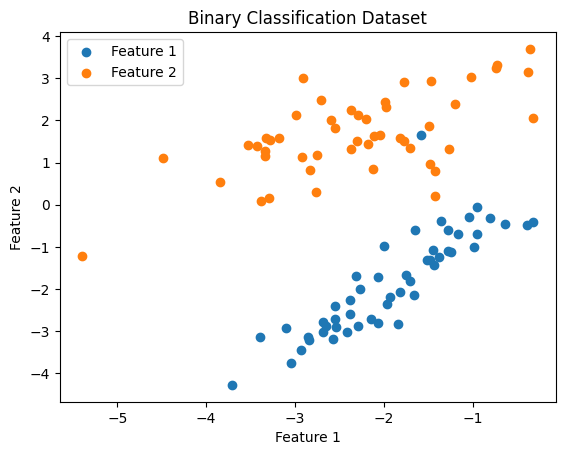

In [48]:
plt.scatter(X[labels == 0][:,0], X[labels == 0][:, 1], label="Feature 1")
plt.scatter(X[labels == 1][:,0], X[labels == 1][:, 1], label="Feature 2")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.legend()
plt.show()

In [51]:
perceptron = Perceptron(input_size=2)
perceptron.train(inputs, labels, num_epochs=10)
x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

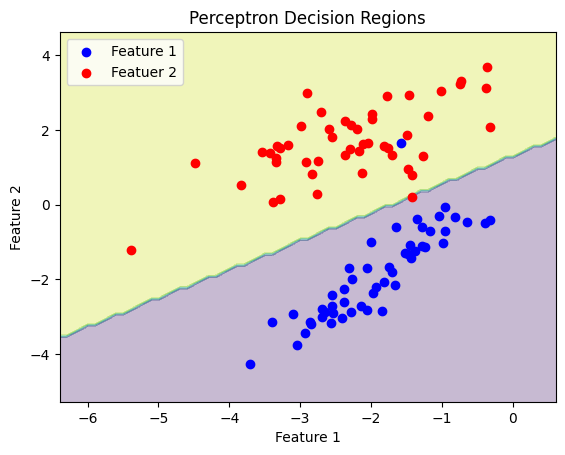

In [53]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(inputs[labels == 0][:, 0], inputs[labels == 0][:, 1], color='blue', label='Feature 1')
plt.scatter(inputs[labels == 1][:, 0], inputs[labels == 1][:, 1], color='red', label='Featuer 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.legend()
plt.show()